In [1]:
#SAVE_DIR = r'C:\Users\wyattluke.lowery\OneDrive - Texas A&M University\Research\GSP\Laplacian Library'
SAVE_DIR = r'C:\Users\wyatt\OneDrive - Texas A&M University\Research\GSP\Laplacian Library'
ROOT_DIR = r'C:\Users\wyatt\OneDrive - Texas A&M University\Research\GSP\Laplacian Library'



# Power system case file paths (Hawaii 37, EastWest ~80k, and Synthetic USA 82k)
DIR    = r"C:\Users\wyattluke.lowery\OneDrive - Texas A&M University\Research\Oscillations\Modal SGWT (Journal)"
TEXAS  = f"{DIR}\Case\ACTIVSg2000_250421.pwb", "TEXAS"
WECC   = f"{DIR}\Case\\240busWECC_2018_PSS.pwb", "WECC"
A70k   = r"C:\Users\wyatt\OneDrive - Texas A&M University\Research\Cases\Eastern 70k\ACTIVSg70k.pwb", "ACTIVSg70k"
DIR    = r"C:\Users\wyattluke.lowery\OneDrive - Texas A&M University\Research\Cases"
HAWAII = f"{DIR}\Hawaii\Hawaii40_20231026.pwb", "HAWAII"
EW     = f"{DIR}\East West 80k\Synthetic_East_West_US.pwb", "EASTWEST"
USA    = f"{DIR}\\USA\\SyntheticUSA.pwb", "USA"

from gridwb import *

import numpy as np
import scipy.sparse as sp
import os
import scipy.io as sio

## Power World Conversion

### Laplacians

In [17]:
ALL = [A70k]#, WECC, HAWAII, EW, USA]

Validate Branches

In [ ]:

def get_rng(x):
    xabs = np.abs(x).astype(float)
    return np.min(xabs), np.max(xabs)

SAVE_DIR = r'C:\Users\wyattluke.lowery\OneDrive - Texas A&M University\Research\GSP\Laplacian Library'

for CASE, NAME in ALL:

    print(f'Computing: {NAME}')

    # Load Case
    wb = GridWorkBench(CASE) 

    # Get Branch
    W = wb.network.lengths() 

    # Print
    print(*get_rng(W))

    # Close Case
    wb.io.esa.CloseCase()

    break

# NOTE lengths are 'too large' and when 1/L^2 it looks like 0
# -----> 2000km seems like a lot, need to verify this, hm.


In [ ]:
LAP_FOLDER = "DELAY"
COORD_FOLDER = "COORDS"

for CASE, NAME in ALL:

    print(f'Computing: {NAME}')

    # Load Case
    wb = GridWorkBench(CASE) 

    LAP = wb.network.laplacian(BranchType.DELAY) 
    mat_path = f"{SAVE_DIR}\{LAP_FOLDER}\{NAME}_{LAP_FOLDER}.mat"
    sio.savemat(mat_path, {"A": LAP})

    # Make and Save Laplacian
    L1, L2 = wb.buscoords()
    out_dict = {
        "longitude": L1, "latitude": L2
    }
    mat_path = f"{SAVE_DIR}\{COORD_FOLDER}\{NAME}_{COORD_FOLDER}.mat"
    sio.savemat(mat_path, out_dict)

    # Close Case
    wb.io.esa.CloseCase()

## .ply Conversion

In [8]:
from gridwb import * 
import scipy.io as sio
from scipy.sparse import csc_matrix

# .ply file paths
BUNZ1  = ROOT_DIR + r"\src\Stanford Bunny\reconstruction\bun_zipper.ply"
BUNZ2 = ROOT_DIR + r"\src\Stanford Bunny\reconstruction\bun_zipper_res2.ply"
BUNZ3 = ROOT_DIR + r"\src\Stanford Bunny\reconstruction\bun_zipper_res3.ply"


# Artifact Laplacian Path --- Source Model
ALL_LAP = [
    (SAVE_DIR + r"\BUNNY\RESOLUTION1", BUNZ1),
    (SAVE_DIR + r"\BUNNY\RESOLUTION2", BUNZ2),
    (SAVE_DIR + r"\BUNNY\RESOLUTION3", BUNZ3),
]

# Artifact Coordinate Path --- Source Model
ALL_COORDS = [
    (SAVE_DIR + r"\SIGNALS\BUNNY_COORDS_RESOLUTION1", BUNZ1),
    (SAVE_DIR + r"\SIGNALS\BUNNY_COORDS_RESOLUTION2", BUNZ2),
    (SAVE_DIR + r"\SIGNALS\BUNNY_COORDS_RESOLUTION3", BUNZ3),
]

for build_file, src_file in ALL_LAP:

    M = Mesh.from_ply(src_file)
    L = csc_matrix(M.to_laplacian())

    sio.savemat(f"{build_file}.mat", {
        "A": L
    })

for build_file, src_file in ALL_COORDS:
    M = Mesh.from_ply(src_file)
    signal = M.get_xyz()

    sio.savemat(f"{build_file}.mat", {
        "x": signal[:, 0], 
        "y": signal[:, 1], 
        "z": signal[:, 2]
    })

c:\Users\wyatt\.conda\envs\esapp\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


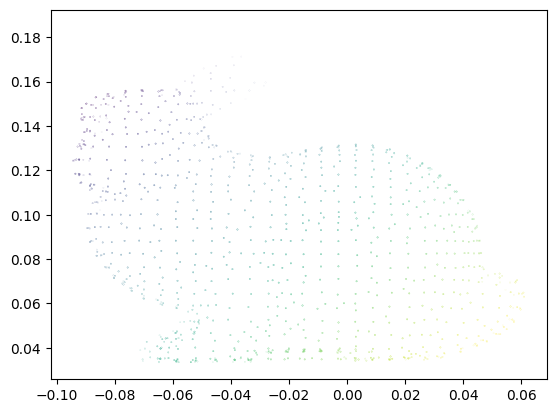

(np.float64(-0.05500000000000001),
 np.float64(0.05500000000000001),
 np.float64(-0.05500000000000001),
 np.float64(0.05500000000000001))

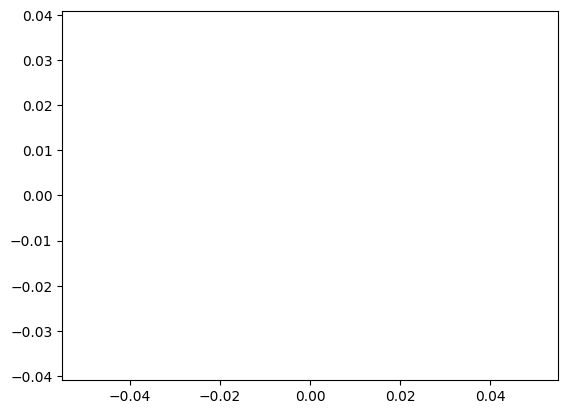

In [5]:
from matplotlib import pyplot as plt

x, y, z = signal.T
plt.scatter(x, y, z, x-y)
plt.show()
plt.axis('equal')